In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [18]:
from MPyDATA import Options
options = Options(n_iters=2, DPDC=True)

nx = 100

from MPyDATA import Stepper
stepper = Stepper(options=options, grid=(nx,))

In [19]:
def psi_0(x):
    a = 5
    return 8*a**3 / (x**2 + 4*a**2)

In [48]:
x, dx = np.linspace(-100, 100, nx, retstep=True)
dt = 1
v = -1

In [49]:
from MPyDATA import ScalarField
from MPyDATA import VectorField
from MPyDATA import PeriodicBoundaryCondition
import numpy as np

halo = options.n_halo
advectee = ScalarField(
    data=psi_0(x), 
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(),)
)
advector = VectorField(
    data=(np.full(nx+1, v*dt/dx),),
    halo=halo,
    boundary_conditions=(PeriodicBoundaryCondition(),)    
)

In [50]:
from MPyDATA import Solver
solver = Solver(stepper=stepper, advectee=advectee, advector=advector)
state = solver.advectee.get()

In [51]:
from matplotlib import pyplot

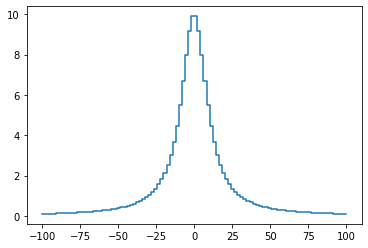

In [52]:
pyplot.step(x, solver.advectee.get(), where='mid')

In [ ]:
solver.advance(nt=1)

In [ ]:
pyplot.step(x, solver.advectee.get(), where='mid')

In [ ]:
assert (state > 0).all()